<a href="https://colab.research.google.com/github/Statany/Statany.github.io/blob/master/2021_07_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 2

In [ ]:
x=[{'city':'seoul','temp':10.0},{'city':"Dubai",'temp':33.5},{'city':"LA",'temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)
vec.fit_transform(x) # X를 범주형 수량화 자료로 변환

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [ ]:
vec1=DictVectorizer() # 메모리를 줄이기위해 sparse=T
x1=vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
x1.toarray()
vec1.get_feature_names()

['city=Dubai', 'city=LA', 'city=seoul', 'temp']

In [ ]:
#텍스트 자료의 수량화
text=["떴다 떴다 비행기 날아라 날아라",
      "높이 높이 날아라 우리 비행기",
      "내가 만든 비행기 날아라 날아라",
      "멀리 멀리 날아라 우리 비행기"]
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec2=CountVectorizer()
t=vec2.fit_transform(text).toarray() # text를 수량화 배열 자료로 변환
import pandas as pd
t1=pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [ ]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x2=tfid.fit_transform(text).toarray() #높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3=pd.DataFrame(x2,columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


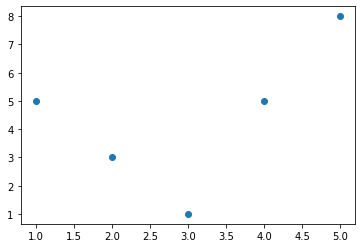

In [ ]:
#특성변수 생성
import matplotlib.pyplot as plt
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([5,3,1,5,8])
plt.plot(x,y,'o') #선형회귀를 하기에는 부적합

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
fg=PolynomialFeatures(degree=3,include_bias=True)# 절편항 여부
x1=fg.fit_transform(x[:,np.newaxis])#3차까지생성
x1

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

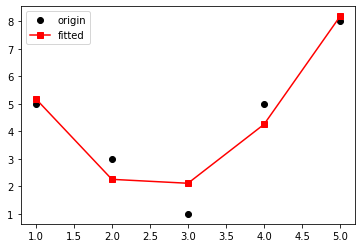

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1,y)
yfit=reg.predict(x1) #적합값
plt.plot(x,y,'ko',label='origin') # ko는 검은색 동그라미
plt.plot(x,yfit,'rs-',label='fitted') #rs-는 빨간색 네모를 줄로 잇기
plt.legend(loc='best') #범주를 제일 적절한 곳으로
plt.show()

In [ ]:
x_miss=np.array([[1,2,3,None],[5,np.NaN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
im=SimpleImputer(strategy='mean')
im.fit_transform(x_miss) # 열의 평균값으로 대체

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

In [ ]:
# pipeline library를 이용한 결측 자료 대체 및 특성변수 생성
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
y=pd.Series([2,5,1,6])
model=make_pipeline(SimpleImputer(strategy="mean"),PolynomialFeatures(degree=2),LinearRegression())
model.fit(x_miss,y)
model.predict(x_miss)

array([2., 5., 1., 6.])

In [ ]:
from google.colab import files
myfile = files.upload()

Saving train2.csv to train2.csv


In [ ]:
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
data = pd.read_csv(io.BytesIO(myfile['train2.csv']))
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/train.csv'
#pandas read_csv로 불러오기
df1 = pd.read_csv(filename)
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822,559.0,1.0,1.0,0,1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
filename="/store.csv"
df2=pd.read_csv(filename)
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
df=pd.merge(df1,df2,on="Store")
df.shape

(252322, 18)

In [13]:
df.dtypes #자료형 확인

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [14]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())

1115
349
5    52330
4    52330
3    52150
2    52150
1    52150
7    51869
6    51215
Name: DayOfWeek, dtype: int64


In [8]:
import pandas as pd
import numpy as np
#df1=pd.read_csv("D:/Users/user/Desktop/train.csv",low_memory=False)

#df2=pd.read_csv("D:/Users/user/Desktop/store.csv",low_memory=False)
#df=pd.merge(df1,df2,on="Store")
df.shape

df.dtypes

print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Quarter']=df['Date'].dt.quarter
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.week
df['Season']=np.where(df['Month'].isin([3,4,5]),'Spring',
                np.where(df['Month'].isin([6,7,8]),'Summer',
                    np.where(df['Month'].isin([9,10,11]),'Fall',
                        np.where(df['Month'].isin([12,1,2]),'Winter','None'))))
print(df[['Date','Year','Month','Day','Week','Quarter','Season']].head())


1115
230
5    36435
4    36435
3    36255
2    36255
1    36255
7    35367
6    35320
Name: DayOfWeek, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b7fa486d0>,
      dtype=object)

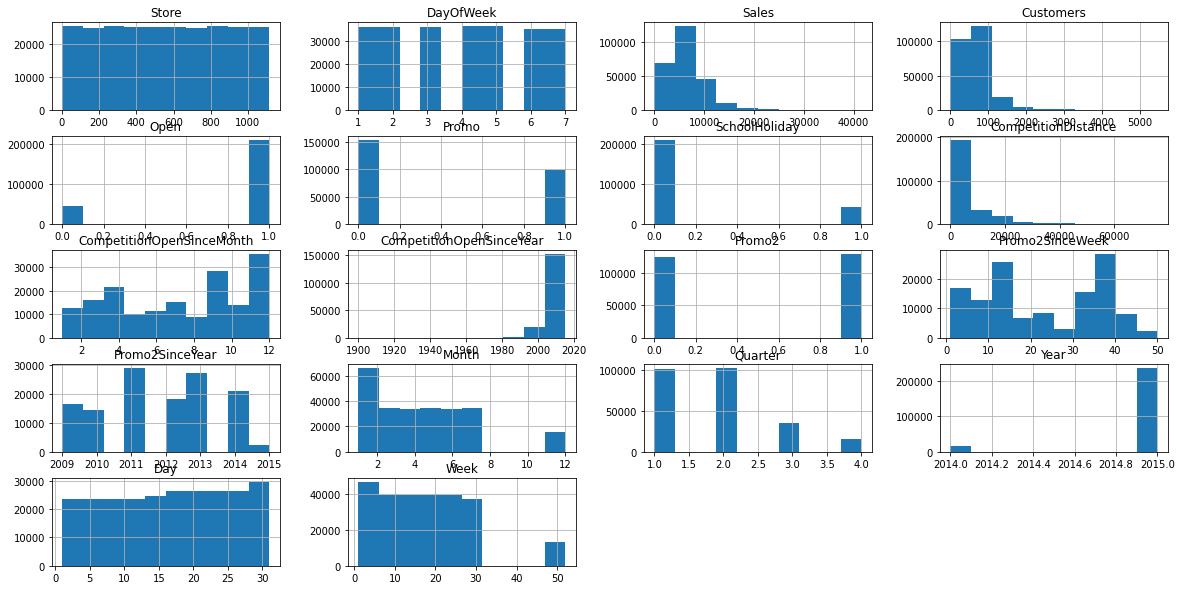

In [9]:
df.hist(figsize=(20,10))

In [10]:
df.isnull().sum()/df.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000396
Open                          0.000396
Promo                         0.000396
StateHoliday                  0.000396
SchoolHoliday                 0.000396
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.265534
CompetitionOpenSinceMonth    31.760607
CompetitionOpenSinceYear     31.760607
Promo2                        0.000000
Promo2SinceWeek              49.220044
Promo2SinceYear              49.220044
PromoInterval                49.220044
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

각 변수의 결측정도 출력,   
10%이하이면 결측치를 대체하기 위한 노력필요  
30% 이상이면 해당 변수를 제거하는 것이 모형의 임의성을 피할 수 있는 거의 유일한 방법  
따라서 현재 0.26%의 결측을 보이고 있는 competitionDistance 변수를 자신의 mode값으로 대체

In [11]:
df['CompetitionDistance']=df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode())
df['CompetitionDistance'].isnull().sum()

670

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
n_columns=['Customers','Open','Promo','Promo2','StateHoliday','SchoolHoliday','CompetitionDistance']
categ_columns=['DayOfWeek','Quarter','Month','Year','StoreType','Assortment','Season']

LabelEncoder는 범주형 변수를 0~(범주수 -1)로 수치화하고 OneHotEncoder는 Label encoding된 자료를 one-hot encoding으로 전환하는 class함수이다.

In [29]:
def dummy(data,col):
  lab=LabelEncoder() #0~c-1로 클래스부여
  aa=lab.fit_transform(data[col]).reshape(-1,1)
  ohe=OneHotEncoder(sparse=False)
  column_names=[col+'_'+str(i) for i in lab.classes_]
  return(pd.DataFrame(ohe.fit_transform(aa),columns=column_names))

In [30]:
fdata=df[n_columns]
for column in categ_columns:
  temp_df=dummy(df,column)
  fdata=pd.concat([fdata,temp_df],axis=1)
fdata.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_12,Year_2014,Year_2015,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Spring,Season_Summer,Season_Winter
0,555.0,1.0,1.0,0,0,1.0,1270.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,546.0,1.0,1.0,0,0,1.0,1270.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,523.0,1.0,1.0,0,0,1.0,1270.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,560.0,1.0,1.0,0,0,1.0,1270.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,612.0,1.0,1.0,0,0,1.0,1270.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
fdata.shape

(252322, 38)

one-hot encoding 후 변수 갯수 38개로 증가

In [33]:
fdata.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

0은 휴일이 아닌날  
a는 공휴일  
b는 부활절  
c는 크리스마스를 의미한다.

# **2.4 불균형자료의 처리**

# 새 섹션